In [131]:
import pandas as pd
import numpy as np

In [132]:
data = pd.read_csv("/Users/HM/Desktop/BAN5753/Exercises/Exercise6/enrollment.csv")

In [133]:
data.head()

,avg_income,CAMPUS_VISIT,CONTACT_CODE1,Contact_Date,Contact_Month,Contact_Year,distance,Target,ETHNICITY,hscrat,...,premiere,REFERRAL_CNTCTS,satscore,SELF_INIT_CNTCTS,sex,SOLICITED_CNTCTS,telecq,TERRITORY,TOTAL_CONTACTS,TRAVEL_INIT_CNTCTS
0,NaN,0,EML,1,Sep,2012,NaN,0,NaN,0.037652,...,0,0,NaN,1,1.0,0,NaN,N,1,0
1,NaN,0,SAT,12,Feb,2014,NaN,0,N,0.037652,...,0,0,NaN,1,1.0,0,NaN,N,1,0
2,NaN,0,C01,16,Jan,2015,NaN,0,C,0.037652,...,0,0,NaN,0,1.0,1,NaN,N,1,0
3,NaN,0,EML,11,Mar,2015,NaN,0,NaN,0.037652,...,0,0,NaN,1,0.0,0,NaN,N,1,0
4,NaN,0,TFL,28,Mar,2015,NaN,0,B,0.037652,...,0,0,1090.0,2,1.0,0,NaN,N,2,0


In [134]:
data=data.dropna()

In [135]:
data.shape

(1701, 29)

In [136]:
print(data.dtypes)

avg_income            float64
CAMPUS_VISIT            int64
CONTACT_CODE1          object
Contact_Date            int64
Contact_Month          object
Contact_Year            int64
distance              float64
Target                  int64
ETHNICITY              object
hscrat                float64
ID                      int64
init_span               int64
Instate                object
int1rat               float64
int2rat               float64
interest                int64
IRSCHOOL               object
LEVEL_YEAR             object
mailq                   int64
premiere                int64
REFERRAL_CNTCTS         int64
satscore              float64
SELF_INIT_CNTCTS        int64
sex                   float64
SOLICITED_CNTCTS        int64
telecq                float64
TERRITORY              object
TOTAL_CONTACTS          int64
TRAVEL_INIT_CNTCTS      int64
dtype: object


In [137]:
df = data.copy(deep=True)

In [138]:
df.drop(['IRSCHOOL'],axis=1, inplace=True)

In [139]:
df=pd.get_dummies(df,prefix='C_Month',columns=['Contact_Month'],drop_first=True)
df=pd.get_dummies(df,prefix='C_Year',columns=['Contact_Year'],drop_first=True)
df=pd.get_dummies(df,prefix='ETH',columns=['ETHNICITY'],drop_first=True)
df=pd.get_dummies(df,prefix='Insta',columns=['Instate'],drop_first=True)
df=pd.get_dummies(df,prefix='TER',columns=['TERRITORY'],drop_first=True)
df=pd.get_dummies(df,prefix='C_CODE1',columns=['CONTACT_CODE1'],drop_first=True)
df=pd.get_dummies(df,prefix='CDate',columns=['Contact_Date'],drop_first=True)

In [140]:
print(df.columns)

Index(['avg_income', 'CAMPUS_VISIT', 'distance', 'Target', 'hscrat', 'ID',
       'init_span', 'int1rat', 'int2rat', 'interest',
       ...
       'CDate_22', 'CDate_23', 'CDate_24', 'CDate_25', 'CDate_26', 'CDate_27',
       'CDate_28', 'CDate_29', 'CDate_30', 'CDate_31'],
      dtype='object', length=150)


In [141]:
df.drop(['ID'],axis=1, inplace=True)

In [142]:
print(df.columns)

Index(['avg_income', 'CAMPUS_VISIT', 'distance', 'Target', 'hscrat',
       'init_span', 'int1rat', 'int2rat', 'interest', 'LEVEL_YEAR',
       ...
       'CDate_22', 'CDate_23', 'CDate_24', 'CDate_25', 'CDate_26', 'CDate_27',
       'CDate_28', 'CDate_29', 'CDate_30', 'CDate_31'],
      dtype='object', length=149)


In [143]:
df.drop(['LEVEL_YEAR'],axis=1, inplace=True)

In [144]:
print(df.columns)

Index(['avg_income', 'CAMPUS_VISIT', 'distance', 'Target', 'hscrat',
       'init_span', 'int1rat', 'int2rat', 'interest', 'mailq',
       ...
       'CDate_22', 'CDate_23', 'CDate_24', 'CDate_25', 'CDate_26', 'CDate_27',
       'CDate_28', 'CDate_29', 'CDate_30', 'CDate_31'],
      dtype='object', length=148)


In [145]:
df.shape

(1701, 148)

In [146]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [147]:
#Logistic Regression Function
def lr(df_x, df_y):
 
    logistic_regression_model = LogisticRegression(random_state=12345)
    logistic_regression_model.fit(df_x, df_y)
    return logistic_regression_model

In [148]:
#Accuracy Function
def accuracy(trained_model, features, targets):
    accuracy_score = trained_model.score(features, targets)
    return accuracy_score

In [149]:
#DataPartition
df_x_train, df_x_val, df_y_train, df_y_val= train_test_split(df[df.columns[~df.columns.isin(['Target'])]],
                                                df['Target'],test_size=0.30, random_state=12345)

In [150]:
lr1 = lr(df_x_train, df_y_train)

/Users/HM/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [151]:
acc1_train=accuracy(lr1,df_x_train,df_y_train)

In [152]:
acc1_train

0.8789915966386554

In [153]:
acc1_val=accuracy(lr1,df_x_val,df_y_val)

In [154]:
acc1_val

0.8767123287671232

In [155]:
#Ques2

In [156]:
df_pca=data.copy(deep=True)

In [157]:
df_pca_x=df_pca.copy(deep=True)

In [158]:
df_pca_x.drop(['CONTACT_CODE1','Contact_Date','Contact_Month','Contact_Year','Target','ETHNICITY','TERRITORY','interest','IRSCHOOL','LEVEL_YEAR','ID'],axis=1,inplace=True)

In [159]:
df_pca_x.shape

(1701, 18)

In [160]:
df_pca_x=pd.get_dummies(df_pca_x,prefix='Insta',columns=['Instate'],drop_first=True)


In [161]:
df_pca_y=df_pca.Target.copy(deep=True)

In [162]:
#Scaling
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df_pca_x_scaled=ss.fit_transform(df_pca_x)

/Users/HM/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/HM/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [163]:
#PCA
from sklearn.decomposition import PCA
pca=PCA(n_components=None)
df_pca_xcomp=pca.fit_transform(df_pca_x_scaled)
CumulativeVariance=pca.explained_variance_ratio_
EigenValues=pca.explained_variance_

In [164]:
CumulativeVarianceDataFrame=pd.DataFrame(CumulativeVariance)
EigenValuesDataFrame=pd.DataFrame(EigenValues)

In [165]:
EigenValuesDataFrame.head(15)

,0
0,3.054747
1,2.321766
2,1.373664
3,1.304749
4,1.208865
5,1.125699
6,1.016190
7,0.944874
8,0.910986
9,0.893245


In [166]:
CumulativeVarianceDataFrame.head(15)

,0
0,0.169608
1,0.128911
2,0.076270
3,0.072443
4,0.067120
5,0.062502
6,0.056422
7,0.052462
8,0.050581
9,0.049596


In [167]:
EV=np.round(EigenValuesDataFrame, decimals=3)

In [168]:
%matplotlib inline

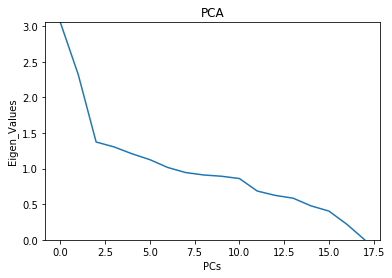

<Figure size 720x576 with 0 Axes>

In [169]:
import matplotlib.pyplot as plt
plt.plot(EV)
plt.ylabel('Eigen_Values')
plt.xlabel('PCs')
plt.title('PCA')
plt.ylim(0,3.055)
plt.style.context('seaborn-whitegrid')
plt.figure(figsize=(10,8));

In [170]:
df_pca_x9comp=pd.DataFrame(df_pca_xcomp[:, :6])

In [171]:
df_pca_x9comp.head()

,0,1,2,3,4,5
0,-2.544097,6.961730,-0.728693,1.575681,1.803301,0.455360
1,0.570534,4.441561,0.041031,2.090079,-0.475716,0.754291
2,-3.491093,4.773035,-0.253470,0.699740,-1.630159,-0.332043
3,-0.950742,7.124113,0.127654,1.001906,-0.170634,2.154710
4,-0.160667,5.011619,0.086328,-0.271832,1.019800,-2.315004


In [172]:
df_pca_x9comp.rename(columns={0: 'PCA1'}, inplace=True)
df_pca_x9comp.rename(columns={1: 'PCA2'}, inplace=True)
df_pca_x9comp.rename(columns={2: 'PCA3'}, inplace=True)
df_pca_x9comp.rename(columns={3: 'PCA4'}, inplace=True)
df_pca_x9comp.rename(columns={4: 'PCA5'}, inplace=True)
df_pca_x9comp.rename(columns={5: 'PCA6'}, inplace=True)
df_pca_x9comp.rename(columns={6: 'PCA7'}, inplace=True)
df_pca_x9comp.rename(columns={7: 'PCA8'}, inplace=True)
df_pca_x9comp.rename(columns={8: 'PCA9'}, inplace=True)

In [173]:
lr_x = pd.concat([df_pca_x9comp.reset_index(drop=True), df_pca.reset_index(drop=True)], axis=1)

In [174]:
#lr_y=lr_x.Target.copy(deep=True)

In [175]:
lr_x.drop(['avg_income', 'CAMPUS_VISIT','distance','hscrat','init_span','Instate','int1rat', 'int2rat','mailq','premiere', 'REFERRAL_CNTCTS', 'satscore', 'SELF_INIT_CNTCTS', 'sex','SOLICITED_CNTCTS','telecq','TOTAL_CONTACTS','TRAVEL_INIT_CNTCTS','LEVEL_YEAR','ID','IRSCHOOL'],axis=1,inplace=True)

In [176]:
lr_x.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,CONTACT_CODE1,Contact_Date,Contact_Month,Contact_Year,Target,ETHNICITY,interest,TERRITORY
0,-2.544097,6.961730,-0.728693,1.575681,1.803301,0.455360,LMI,5,Aug,2015,1,C,0,5
1,0.570534,4.441561,0.041031,2.090079,-0.475716,0.754291,PHN,12,Feb,2015,1,C,2,5
2,-3.491093,4.773035,-0.253470,0.699740,-1.630159,-0.332043,SAT,27,Oct,2015,1,O,0,5
3,-0.950742,7.124113,0.127654,1.001906,-0.170634,2.154710,LMI,23,Jul,2015,1,C,1,5
4,-0.160667,5.011619,0.086328,-0.271832,1.019800,-2.315004,EML,8,Jan,2014,1,C,0,5


In [177]:
lr_x=pd.get_dummies(lr_x,prefix='C_Month',columns=['Contact_Month'],drop_first=True)
lr_x=pd.get_dummies(lr_x,prefix='C_Year',columns=['Contact_Year'],drop_first=True)
lr_x=pd.get_dummies(lr_x,prefix='ETH',columns=['ETHNICITY'],drop_first=True)
lr_x=pd.get_dummies(lr_x,prefix='TER',columns=['TERRITORY'],drop_first=True)
lr_x=pd.get_dummies(lr_x,prefix='C_CODE1',columns=['CONTACT_CODE1'],drop_first=True)
#lr_x=pd.get_dummies(lr_x,prefix='IRSC',columns=['IRSCHOOL'],drop_first=True)
lr_x=pd.get_dummies(lr_x,prefix='CDate',columns=['Contact_Date'],drop_first=True)

In [178]:
#DataPartition
df_x_train_pca, df_x_val_pca, df_y_train_pca, df_y_val_pca= train_test_split(lr_x[lr_x.columns[~lr_x.columns.isin(['Target'])]],
                                                lr_x['Target'],test_size=0.30, random_state=12345)

In [179]:
lr_2 = lr(df_x_train_pca, df_y_train_pca)

/Users/HM/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [180]:
acc2_train=accuracy(lr_2,df_x_train_pca,df_y_train_pca)

In [181]:
acc2_train

0.9168067226890756

In [182]:
acc2_val=accuracy(lr_2,df_x_val_pca,df_y_val_pca)

In [183]:
acc2_val

0.9099804305283757

In [184]:
#Ques3

In [185]:
from varclushi import VarClusHi
vc = VarClusHi(df_pca_x,maxeigval2=1,maxclus=None)
vc.varclus()

In [186]:
vc.info

,Cluster,N_Vars,Eigval1,Eigval2,VarProp
0,0,5,2.374926,0.987650,0.474985
1,1,4,2.110315,0.984445,0.527579
2,2,3,1.679487,0.820497,0.559829
3,3,3,1.242258,0.987112,0.414086
4,4,3,1.125499,0.997061,0.375166


In [187]:
vc.rsquare

,Cluster,Variable,RS_Own,RS_NC,RS_Ratio
0,0,premiere,0.508033,0.020367,0.502195
1,0,REFERRAL_CNTCTS,0.045358,0.009347,0.963649
2,0,SELF_INIT_CNTCTS,0.873615,0.067726,0.135566
3,0,telecq,0.067003,0.000839,0.933781
4,0,TOTAL_CONTACTS,0.880917,0.208829,0.150515
5,1,distance,0.822962,0.052379,0.186824
6,1,hscrat,0.473930,0.017420,0.535396
7,1,Insta_Y,0.782087,0.104512,0.243345
8,1,sex,0.031336,0.006247,0.974754
9,2,mailq,0.636749,0.059208,0.386112


In [188]:
RS=pd.DataFrame(vc.rsquare)

In [189]:
RS['1-RSq_Ratio']=1-RS['RS_Ratio']

In [190]:
RS.head(18)

,Cluster,Variable,RS_Own,RS_NC,RS_Ratio,1-RSq_Ratio
0,0,premiere,0.508033,0.020367,0.502195,0.497805
1,0,REFERRAL_CNTCTS,0.045358,0.009347,0.963649,0.036351
2,0,SELF_INIT_CNTCTS,0.873615,0.067726,0.135566,0.864434
3,0,telecq,0.067003,0.000839,0.933781,0.066219
4,0,TOTAL_CONTACTS,0.880917,0.208829,0.150515,0.849485
5,1,distance,0.822962,0.052379,0.186824,0.813176
6,1,hscrat,0.473930,0.017420,0.535396,0.464604
7,1,Insta_Y,0.782087,0.104512,0.243345,0.756655
8,1,sex,0.031336,0.006247,0.974754,0.025246
9,2,mailq,0.636749,0.059208,0.386112,0.613888


In [191]:
#

In [192]:
VC_x=lr_x.copy(deep=True)
#VC_y=lr_y.copy(deep=True)

In [193]:
VC_x.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,Target,interest,C_Month_Aug,C_Month_Dec,...,CDate_22,CDate_23,CDate_24,CDate_25,CDate_26,CDate_27,CDate_28,CDate_29,CDate_30,CDate_31
0,-2.544097,6.961730,-0.728693,1.575681,1.803301,0.455360,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0.570534,4.441561,0.041031,2.090079,-0.475716,0.754291,1,2,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-3.491093,4.773035,-0.253470,0.699740,-1.630159,-0.332043,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,-0.950742,7.124113,0.127654,1.001906,-0.170634,2.154710,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,-0.160667,5.011619,0.086328,-0.271832,1.019800,-2.315004,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [194]:
VC_x.drop(['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6'],axis=1,inplace=True)

In [195]:
vc_df=df_pca_x.copy(deep=True)

In [196]:
vc_df.head()

,avg_income,CAMPUS_VISIT,distance,hscrat,init_span,int1rat,int2rat,mailq,premiere,REFERRAL_CNTCTS,satscore,SELF_INIT_CNTCTS,sex,SOLICITED_CNTCTS,telecq,TOTAL_CONTACTS,TRAVEL_INIT_CNTCTS,Insta_Y
103,129811.0,1,1619.280260,1.000000,13,0.012870,0.047619,5,0,0,1300.0,6,1.0,0,2.0,6,0,0
104,71174.0,1,1606.402312,0.333333,19,0.029188,0.200000,5,1,0,1120.0,8,1.0,1,2.0,10,1,0
106,50879.0,0,1641.800269,0.500000,11,0.017183,0.020380,5,0,0,1070.0,4,1.0,0,2.0,4,0,0
114,36318.0,1,1659.508194,1.000000,14,0.100478,0.011236,5,0,0,1310.0,9,1.0,1,2.0,10,0,0
127,103326.0,0,1409.551978,0.500000,32,0.012116,0.030612,3,1,0,1300.0,8,0.0,0,2.0,8,0,0


In [197]:
vc_df.drop(['premiere', 'distance', 'hscrat','int1rat', 'int2rat', 'mailq', 
            'satscore', 'SELF_INIT_CNTCTS',  'SOLICITED_CNTCTS', 
            'telecq','TOTAL_CONTACTS', 'TRAVEL_INIT_CNTCTS', 'Insta_Y'],axis=1,inplace=True)

In [198]:
vc_df.head()

,avg_income,CAMPUS_VISIT,init_span,REFERRAL_CNTCTS,sex
103,129811.0,1,13,0,1.0
104,71174.0,1,19,0,1.0
106,50879.0,0,11,0,1.0
114,36318.0,1,14,0,1.0
127,103326.0,0,32,0,0.0


In [199]:
VC_model = pd.concat([VC_x.reset_index(drop=True), vc_df.reset_index(drop=True)], axis=1)

In [200]:
VC_model.head()

,Target,interest,C_Month_Aug,C_Month_Dec,C_Month_Feb,C_Month_Jan,C_Month_Jul,C_Month_Jun,C_Month_Mar,C_Month_May,...,CDate_27,CDate_28,CDate_29,CDate_30,CDate_31,avg_income,CAMPUS_VISIT,init_span,REFERRAL_CNTCTS,sex
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,129811.0,1,13,0,1.0
1,1,2,0,0,1,0,0,0,0,0,...,0,0,0,0,0,71174.0,1,19,0,1.0
2,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,50879.0,0,11,0,1.0
3,1,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,36318.0,1,14,0,1.0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,103326.0,0,32,0,0.0


In [201]:
#DataPartition
df_x_train_vc, df_x_val_vc, df_y_train_vc, df_y_val_vc= train_test_split(VC_model[VC_model.columns[~VC_model.columns.isin(['Target'])]],
                                                VC_model['Target'],test_size=0.30, random_state=12345)

In [202]:
lr_3 = lr(df_x_train_vc, df_y_train_vc)

/Users/HM/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [203]:
acc3_train=accuracy(lr_3,df_x_train_vc,df_y_train_vc)

In [204]:
acc3_train

0.8697478991596639

In [205]:
acc3_val=accuracy(lr_3,df_x_val_vc,df_y_val_vc)

In [206]:
acc3_val

0.863013698630137

In [207]:
#Ques4

In [208]:
df4 = data.copy(deep=True)

In [209]:
df4.drop(['ID','LEVEL_YEAR','IRSCHOOL'],axis=1, inplace=True)

In [210]:
df4['Instate']=np.where(df4['Instate']=='Y',1,0)

In [211]:
df4.shape

(1701, 26)

In [212]:
df4.to_csv("/Users/HM/Desktop/BAN5753/Exercises/Exercise6/R_Enroll.csv",index=False)

In [213]:
df_pls=df.drop(['hscrat','int1rat', 'int2rat','premiere', 'REFERRAL_CNTCTS', 'satscore', 'sex','TRAVEL_INIT_CNTCTS'],axis=1)

In [215]:
df_pls.head()

,avg_income,CAMPUS_VISIT,distance,Target,init_span,interest,mailq,SELF_INIT_CNTCTS,SOLICITED_CNTCTS,telecq,...,CDate_22,CDate_23,CDate_24,CDate_25,CDate_26,CDate_27,CDate_28,CDate_29,CDate_30,CDate_31
103,129811.0,1,1619.280260,1,13,0,5,6,0,2.0,...,0,0,0,0,0,0,0,0,0,0
104,71174.0,1,1606.402312,1,19,2,5,8,1,2.0,...,0,0,0,0,0,0,0,0,0,0
106,50879.0,0,1641.800269,1,11,0,5,4,0,2.0,...,0,0,0,0,0,1,0,0,0,0
114,36318.0,1,1659.508194,1,14,1,5,9,1,2.0,...,0,1,0,0,0,0,0,0,0,0
127,103326.0,0,1409.551978,1,32,0,3,8,0,2.0,...,0,0,0,0,0,0,0,0,0,0


In [216]:
df_x_train_pls, df_x_val_pls, df_y_train_pls, df_y_val_pls= train_test_split(df_pls[df_pls.columns[~df_pls.columns.isin(['Target'])]],
                                                df_pls['Target'],test_size=0.30, random_state=12345)

In [217]:
lr_4 = lr(df_x_train_pls, df_y_train_pls)

/Users/HM/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [219]:
acc4_train=accuracy(lr_4,df_x_train_pls,df_y_train_pls)

In [220]:
acc4_train

0.8890756302521008

In [221]:
acc4_val=accuracy(lr_4,df_x_val_pls,df_y_val_pls)

In [222]:
acc4_val

0.8825831702544031

In [223]:
#Ques5

In [225]:
df_lrs=df.drop(['avg_income', 'distance','init_span',
           'int1rat', 'int2rat','mailq', 'REFERRAL_CNTCTS', 'sex','SOLICITED_CNTCTS','telecq','TRAVEL_INIT_CNTCTS'],axis=1)

In [226]:
df_x_train_lrs, df_x_val_lrs, df_y_train_lrs, df_y_val_lrs= train_test_split(df_lrs[df_lrs.columns[~df_lrs.columns.isin(['Target'])]],
                                                df_lrs['Target'],test_size=0.30, random_state=12345)

In [227]:
lr_5 = lr(df_x_train_lrs, df_y_train_lrs)

/Users/HM/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [228]:
acc5_train=accuracy(lr_5,df_x_train_lrs,df_y_train_lrs)

In [229]:
acc5_train

0.9050420168067227

In [230]:
acc5_val=accuracy(lr_5,df_x_val_lrs,df_y_val_lrs)

In [231]:
acc5_val

0.9060665362035225